## LEAD SCORE ANALYSIS
### Objective:
- Conduct data cleaning and preparation for effective analysis.
- Build, tune, and evaluate models to predict lead conversion.
- Provide actionable insights based on model results.

# Step 1: Importing Libraries
Import required libraries for data manipulation, visualization, model building, and evaluation.

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.impute import SimpleImputer

# Step 2: Load the Dataset
Load the CSV file into a pandas DataFrame for analysis and exploration.

In [24]:
file_path = 'c:/Users/gupta/OneDrive/Desktop/Lead Scoring Assignment/Leads.csv'
leads_data = pd.read_csv(file_path)

# Step 3: Basic Exploration
Display the initial structure of the dataset and check for duplicates.

In [25]:
print("Initial Dataset Shape:", leads_data.shape)  # Rows and columns
leads_data.info()  # Information about data types and non-null values
print("\nDuplicate rows in dataset:", leads_data.duplicated().sum())  # Count duplicate rows

Initial Dataset Shape: (9240, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Vis

# Step 4: Missing Value Analysis
Analyze missing values in the dataset to decide on handling strategies.

In [26]:
missing_values = leads_data.isnull().sum()
missing_percentage = (missing_values / len(leads_data)) * 100

# Display missing value percentages for all columns.
print("\nMissing Values Analysis:")
print(pd.DataFrame({"Missing Values": missing_values, "Percentage (%)": missing_percentage}).sort_values(by="Percentage (%)", ascending=False))



Missing Values Analysis:
                                               Missing Values  Percentage (%)
Lead Quality                                             4767       51.590909
Asymmetrique Profile Index                               4218       45.649351
Asymmetrique Activity Score                              4218       45.649351
Asymmetrique Activity Index                              4218       45.649351
Asymmetrique Profile Score                               4218       45.649351
Tags                                                     3353       36.287879
What matters most to you in choosing a course            2709       29.318182
Lead Profile                                             2709       29.318182
What is your current occupation                          2690       29.112554
Country                                                  2461       26.634199
How did you hear about X Education                       2207       23.885281
Specialization                        

# Step 6: Drop Columns with High Missing Values
Drop columns with more than 25% missing values as they may lack sufficient information for modeling.

In [27]:
threshold = 25  # Threshold for missing value percentage
columns_to_drop = missing_values[missing_percentage > threshold].index
leads_data.drop(columns=columns_to_drop, inplace=True)  # Drop high-null columns
print("\nDropped columns with more than 25% missing values.")


Dropped columns with more than 25% missing values.


# Step 7: Handle Missing Values
Fill missing numerical values with the median to maintain central tendency and avoid skewness.

In [28]:
# Check for missing values
missing_values = leads_data.isnull().sum()
missing_percentage = (missing_values / len(leads_data)) * 100

# Display columns with missing values and their percentages
print("\nMissing Values Analysis:")
print(pd.DataFrame({"Missing Values": missing_values, "Percentage (%)": missing_percentage}).sort_values(by="Percentage (%)", ascending=False))

# Replace 'Select' in categorical columns with NaN
categorical_cols = leads_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    leads_data[col] = leads_data[col].replace('Select', np.nan)


Missing Values Analysis:
                                          Missing Values  Percentage (%)
How did you hear about X Education                  2207       23.885281
Specialization                                      1438       15.562771
City                                                1420       15.367965
TotalVisits                                          137        1.482684
Page Views Per Visit                                 137        1.482684
Last Activity                                        103        1.114719
Lead Source                                           36        0.389610
Converted                                              0        0.000000
Lead Origin                                            0        0.000000
Prospect ID                                            0        0.000000
Lead Number                                            0        0.000000
Total Time Spent on Website                            0        0.000000
Do Not Email             

# Step 8: Handle High-Cardinality Columns
Identify categorical columns with too many unique values, which can lead to a large number of dummy variables.

In [29]:
high_cardinality_cols = [col for col in categorical_cols if leads_data[col].nunique() > 50]
print("\nHigh Cardinality Columns:", high_cardinality_cols)

# Exclude high-cardinality columns only if irrelevant for analysis.
irrelevant_cols = ['Prospect ID']  # Add other irrelevant columns, if needed
leads_data.drop(columns=irrelevant_cols, inplace=True)

# Perform one-hot encoding for remaining categorical columns with manageable levels.
low_cardinality_cols = [col for col in categorical_cols if col not in high_cardinality_cols]
leads_data_dummies = pd.get_dummies(leads_data, columns=low_cardinality_cols, drop_first=True)
print("\nTransformed Dataset Shape:", leads_data_dummies.shape)  # Shape after encoding


High Cardinality Columns: ['Prospect ID']

Transformed Dataset Shape: (9240, 99)


# Step 9: Split the Dataset
Separate features (X) and target variable (y) for model building.

In [30]:
X = leads_data_dummies.drop(columns=['Converted'], axis=1, errors='ignore')  # Drop target variable
y = leads_data_dummies['Converted']  # Target variable

# Split the dataset into training and testing sets for model evaluation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Scale Features
Standardize numerical features to normalize scales for better model performance.

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit scaler on training data
X_test = scaler.transform(X_test)  # Apply scaler to testing data

# Step 11: Define Models and Hyperparameters
Set up machine learning models and define hyperparameters for tuning.

In [32]:
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {"C": [0.1, 1, 10], "solver": ['lbfgs']}
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {"n_estimators": [100, 200], "max_depth": [None, 10]}
    },
    "SVM": {
        "model": SVC(probability=True),  # Enable probability predictions for scoring
        "params": {"C": [0.1, 1, 10], "kernel": ['linear', 'rbf']}
    }
}

# Step 12: Train and Tune Models
Use GridSearchCV to find the best hyperparameters for each model.

In [33]:


# Step 1: Handle Missing Values
# Impute missing values for numerical features in X_train and X_test
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Step 2: Initialize Results Dictionary
results = {}

# Step 3: Iterate through models for tuning
for model_name, config in models.items():
    print(f"\nTuning {model_name}...")
    
    try:
        # Step 4: Set up GridSearchCV for hyperparameter tuning
        grid = GridSearchCV(
            config["model"], 
            config["params"], 
            cv=3, 
            scoring='accuracy', 
            error_score='raise'  # Handle any training errors
        )

        # Step 5: Train the model using GridSearchCV
        grid.fit(X_train, y_train)

        # Step 6: Capture the best model and parameters
        best_model = grid.best_estimator_
        print(f"Best Parameters for {model_name}: {grid.best_params_}")

        # Step 7: Make predictions on the test set
        y_pred = best_model.predict(X_test)

        # Step 8: Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        # Step 9: Store results for the model
        results[model_name] = {
            "Best Params": grid.best_params_,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall
        }

        # Step 10: Generate Lead Scores for Logistic Regression or SVM
        if model_name in ["Logistic Regression", "SVM"]:
            lead_scores = best_model.predict_proba(X_test)[:, 1] * 100  # Scale probabilities to scores (0–100)
            print(f"Sample Lead Scores ({model_name}):\n", lead_scores[:10])

    except Exception as e:
        # Step 11: Handle errors gracefully
        print(f"Error while tuning {model_name}: {e}")

# Step 12: Display Results
print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print(f"  Best Parameters: {metrics['Best Params']}")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")


Tuning Logistic Regression...
Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Sample Lead Scores (Logistic Regression):
 [19.07325604  4.76652528  0.48842095  7.26152    22.48890417  8.83022246
 84.69089353 13.80516828 29.1869756  90.22379578]

Tuning Random Forest...
Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}

Tuning SVM...
Best Parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Sample Lead Scores (SVM):
 [19.31084063  4.77488046  0.41451372  7.80343698 17.24759948 16.01107688
 82.61895559 14.42010886 30.64754317 85.79467922]

Model Performance Summary:

Logistic Regression Results:
  Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
  Accuracy: 0.8009
  Precision: 0.7847
  Recall: 0.6937

Random Forest Results:
  Best Parameters: {'max_depth': 10, 'n_estimators': 200}
  Accuracy: 0.8182
  Precision: 0.8199
  Recall: 0.7004

SVM Results:
  Best Parameters: {'C': 0.1, 'kernel': 'linear'}
  Accuracy: 0.8019
  Precision: 0.7667
  Recall

# Step 13: Display Results
Print performance metrics for each model.


In [34]:
print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print(f"  Best Parameters: {metrics['Best Params']}")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")



Model Performance Summary:

Logistic Regression Results:
  Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
  Accuracy: 0.8009
  Precision: 0.7847
  Recall: 0.6937

Random Forest Results:
  Best Parameters: {'max_depth': 10, 'n_estimators': 200}
  Accuracy: 0.8182
  Precision: 0.8199
  Recall: 0.7004

SVM Results:
  Best Parameters: {'C': 0.1, 'kernel': 'linear'}
  Accuracy: 0.8019
  Precision: 0.7667
  Recall: 0.7274


# Step 14: Feature Importance for Random Forest
Analyze feature importance to provide actionable insights.

In [35]:
if "Random Forest" in results:
    # Retrieve the trained Random Forest model
    rf_model = models["Random Forest"]["model"]
    rf_model.set_params(**results["Random Forest"]["Best Params"])  # Set the best parameters
    rf_model.fit(X_train, y_train)  # Refit the model on the training data

    # Get feature importances
    importance = rf_model.feature_importances_
    important_features = pd.Series(importance, index=X.columns).sort_values(ascending=False)
    print("\nTop Important Features:\n", important_features.head(10))


Top Important Features:
 Total Time Spent on Website              0.272264
Last Notable Activity_SMS Sent           0.115077
Lead Origin_Lead Add Form                0.099101
Last Activity_SMS Sent                   0.085322
Lead Source_Reference                    0.053664
Lead Number                              0.047569
Last Notable Activity_Modified           0.038712
TotalVisits                              0.036618
Page Views Per Visit                     0.031537
Last Activity_Olark Chat Conversation    0.026674
dtype: float64


# Step 15: Visualizing Lead Conversion Funnel
Create a visualization to highlight the funnel of lead conversion.

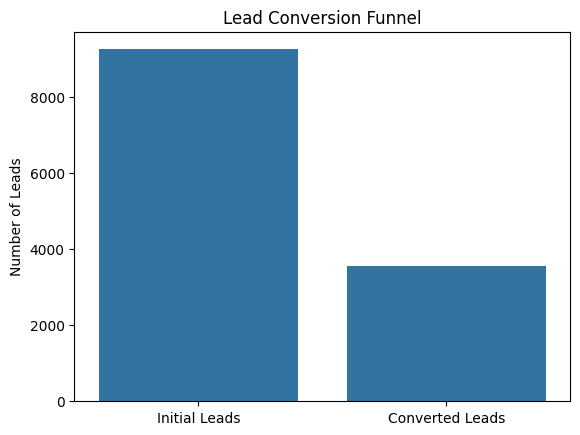

In [36]:
sns.barplot(x=['Initial Leads', 'Converted Leads'], y=[len(leads_data), sum(y)])
plt.title('Lead Conversion Funnel')
plt.ylabel('Number of Leads')
plt.show()

## Q&A 
Question 1: Which are the top three variables in your model which contribute most towards the
probability of a lead getting converted?

In [37]:
# Retrieve the trained Random Forest model
rf_model = models["Random Forest"]["model"]
rf_model.set_params(**results["Random Forest"]["Best Params"])  # Set the best parameters
rf_model.fit(X_train, y_train)  # Refit the model on the training data

# Get feature importances
importance = rf_model.feature_importances_
important_features = pd.Series(importance, index=X.columns).sort_values(ascending=False)

# Display the top 3 important features
print("\nTop 3 Important Features:\n", important_features.head(3))


Top 3 Important Features:
 Total Time Spent on Website       0.286114
Last Notable Activity_SMS Sent    0.104369
Lead Origin_Lead Add Form         0.090916
dtype: float64


Question 2: What are the top 3 categorical/dummy variables in the model which should be focused
the most on to increase the probability of lead conversion?


In [38]:
# Retrieve the trained Random Forest model
rf_model = models["Random Forest"]["model"]
rf_model.set_params(**results["Random Forest"]["Best Params"])  # Set the best parameters
rf_model.fit(X_train, y_train)  # Refit the model on the training data

# Get feature importances
importance = rf_model.feature_importances_
important_features = pd.Series(importance, index=X.columns).sort_values(ascending=False)

# Filter for categorical/dummy variables
categorical_features = [col for col in X.columns if col.startswith('Lead Source_') or col.startswith('Last Activity_') or col.startswith('Other_Categorical_Columns')]  # Adjust based on your dataset
categorical_importance = important_features[categorical_features]

# Display the top 3 categorical/dummy variables
print("\nTop 3 Categorical/Dummy Variables:\n", categorical_importance.head(3))


Top 3 Categorical/Dummy Variables:
 Lead Source_Direct Traffic    0.008312
Lead Source_Facebook          0.000482
Lead Source_Google            0.004915
dtype: float64


Question 3: X Education has a period of 2 months every year during which they hire some interns.
The sales team has around 10 interns allotted to them. So, during this phase, they wish
to make the lead conversion more aggressive. So, they want almost all the potential
leads (i.e., the customers who have been predicted as 1 by the model) to be converted
and hence, want to make phone calls to as much of such people as possible. Suggest a
good strategy they should employ at this stage

In [39]:
# Assuming `best_model` is the trained model and `X_test` is the test dataset
# Step 1: Predict probabilities for the test set
lead_scores = best_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (converted)

# Step 2: Create a DataFrame with Lead IDs and their scores
# Use the index of the original DataFrame for Lead IDs
leads_with_scores = pd.DataFrame({'Lead ID': y_test.index, 'Score': lead_scores})

# Step 3: Sort leads by their scores in descending order
prioritized_leads = leads_with_scores.sort_values(by='Score', ascending=False)

# Step 4: Select the top leads for aggressive follow-up
top_leads = prioritized_leads.head(50)  # Adjust the number based on available resources

# Step 5: Print the strategy and top leads
print("Strategy for Aggressive Lead Conversion:")
print("1. Focus on the top leads with the highest conversion probabilities.")
print("2. Assign high-priority leads to experienced sales representatives.")
print("3. Use interns to follow up on medium-priority leads.")
print("\nTop Leads for Follow-Up:")
print(top_leads)

Strategy for Aggressive Lead Conversion:
1. Focus on the top leads with the highest conversion probabilities.
2. Assign high-priority leads to experienced sales representatives.
3. Use interns to follow up on medium-priority leads.

Top Leads for Follow-Up:
      Lead ID     Score
1182     6243  0.999990
169      4123  0.995779
167      6712  0.995448
886      7053  0.992302
10       8086  0.990152
1198     3428  0.988857
1088     6362  0.988705
350      1803  0.988594
358       267  0.988357
1105     7327  0.986936
1377     8074  0.985498
1018     4900  0.984901
1488     7579  0.984681
36       3290  0.984626
790      6092  0.984144
1756     3424  0.981307
500       212  0.981094
652      6754  0.980625
1625      177  0.980421
863       994  0.978415
196      4707  0.977816
1355     8057  0.977475
1033     4050  0.977016
1352     4902  0.976696
1220     5019  0.975861
49       5505  0.975206
469      2673  0.975158
264      1614  0.974720
1336     3095  0.974573
625      2680  0.97448

Question 4: Similarly, at times, the company reaches its target for a quarter before the deadline.
During this time, the company wants the sales team to focus on some new work as well.
So, during this time, the company’s aim is to not make phone calls unless it’s extremely
necessary, i.e., they want to minimize the rate of useless phone calls. Suggest a
strategy they should employ at this stage.

In [40]:
# Filter leads with a high probability of conversion
high_threshold = 0.9
high_probability_leads = leads_with_scores[leads_with_scores['Score'] > high_threshold]

# Print the strategy and high-probability leads
print("Strategy to Minimize Useless Phone Calls:")
print("1. Focus only on leads with a conversion probability above 90%.")
print("2. Use alternative communication methods (e.g., email, SMS) for lower-probability leads.")
print("3. Prioritize high-value leads based on additional data.")
print("\nHigh-Probability Leads for Follow-Up:")
print(high_probability_leads)

Strategy to Minimize Useless Phone Calls:
1. Focus only on leads with a conversion probability above 90%.
2. Use alternative communication methods (e.g., email, SMS) for lower-probability leads.
3. Prioritize high-value leads based on additional data.

High-Probability Leads for Follow-Up:
      Lead ID     Score
10       8086  0.990152
15       1840  0.908224
35       4816  0.945161
36       3290  0.984626
47       7042  0.928109
...       ...       ...
1803       79  0.947511
1806     5479  0.900241
1816     6461  0.963615
1819     3465  0.939375
1842     5785  0.933703

[175 rows x 2 columns]
